# Coffee Sales Analysis

Beginner-friendly data analysis of coffee sales. We'll cover:
- Loading data
- Inspecting and cleaning
- Feature engineering
- Exploratory data analysis (EDA)
- Simple insights and saving cleaned data

Dataset: `Coffe_sales.csv`


In [2]:
# Imports and settings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")


In [3]:
# Load data
csv_path = 'Coffe_sales.csv'  # ensure this file is in the same folder as this notebook
raw_df = pd.read_csv(csv_path)
raw_df.head()


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [4]:
# Basic info and initial checks
print(raw_df.shape)
raw_df.info()
raw_df.describe(include='all').T.head(20)


(3547, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hour_of_day,3547.0,NaN,NaN,NaN,14.185791,4.23401,6.0,10.0,14.0,18.0,22.0
cash_type,3547,1,card,3547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
money,3547.0,NaN,NaN,NaN,31.645216,4.877754,18.12,27.92,32.82,35.76,38.7
coffee_name,3547,8,Americano with Milk,809,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_of_Day,3547,3,Afternoon,1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekday,3547,7,Tue,572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month_name,3547,12,Mar,494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekdaysort,3547.0,NaN,NaN,NaN,3.845785,1.971501,1.0,2.0,4.0,6.0,7.0
Monthsort,3547.0,NaN,NaN,NaN,6.453905,3.500754,1.0,3.0,7.0,10.0,12.0
Date,3547,381,2024-10-11,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Cleaning: rename columns to snake_case and fix types

df = raw_df.copy()

# Standardize column names
rename_map = {
    'hour_of_day': 'hour_of_day',
    'cash_type': 'payment_type',
    'money': 'amount',
    'coffee_name': 'coffee_name',
    'Time_of_Day': 'time_of_day',
    'Weekday': 'weekday',
    'Month_name': 'month_name',
    'Weekdaysort': 'weekday_sort',
    'Monthsort': 'month_sort',
    'Date': 'date',
    'Time': 'time',
}
df = df.rename(columns=rename_map)

# Coerce numeric columns
for col in ['hour_of_day', 'amount', 'weekday_sort', 'month_sort']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Parse datetimes
# Create a combined datetime if possible
try:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S.%f', errors='coerce').dt.time
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str), errors='coerce')
except Exception as e:
    print('Datetime parse warning:', e)

# Trim strings
for col in ['payment_type', 'coffee_name', 'time_of_day', 'weekday', 'month_name']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

# Drop exact duplicates
before = len(df)
df = df.drop_duplicates()
after = len(df)
print(f'Dropped {before - after} duplicate rows')

# Basic missing value report
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0].head(20)


Dropped 0 duplicate rows


datetime    8
time        8
dtype: int64

In [6]:
# Simple imputations / filtering (beginner-friendly)

# Drop rows missing critical fields (amount, coffee_name)
critical_cols = ['amount', 'coffee_name']
clean_df = df.dropna(subset=critical_cols).copy()

# Keep reasonable hours (0-23)
clean_df = clean_df[(clean_df['hour_of_day'] >= 0) & (clean_df['hour_of_day'] <= 23)]

# Ensure positive amounts
clean_df = clean_df[clean_df['amount'] > 0]

clean_df.shape


(3547, 12)

In [7]:
# Feature engineering

# Hour already present; create handy flags
clean_df['is_weekend'] = clean_df['weekday'].isin(['Sat', 'Sun'])

# If datetime exists, extract date-only for grouping
if 'datetime' in clean_df.columns:
    clean_df['date_only'] = pd.to_datetime(clean_df['datetime']).dt.date
else:
    # fallback from 'date' column
    if 'date' in clean_df.columns:
        clean_df['date_only'] = pd.to_datetime(clean_df['date']).dt.date

clean_df[['hour_of_day', 'time_of_day', 'weekday', 'month_name', 'is_weekend']].head()


,hour_of_day,time_of_day,weekday,month_name,is_weekend
0,10,Morning,Fri,Mar,False
1,12,Afternoon,Fri,Mar,False
2,12,Afternoon,Fri,Mar,False
3,13,Afternoon,Fri,Mar,False
4,13,Afternoon,Fri,Mar,False


In [8]:
# EDA 1: Overall sales stats

print('Total rows:', len(clean_df))
print('Total revenue:', round(clean_df['amount'].sum(), 2))
print('Average ticket:', round(clean_df['amount'].mean(), 2))
print('Unique drinks:', clean_df['coffee_name'].nunique())


Total rows: 3547
Total revenue: 112245.58
Average ticket: 31.65
Unique drinks: 8


coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: amount, dtype: float64


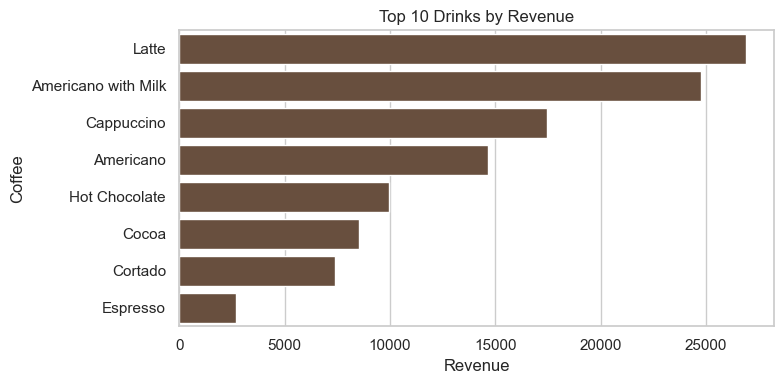

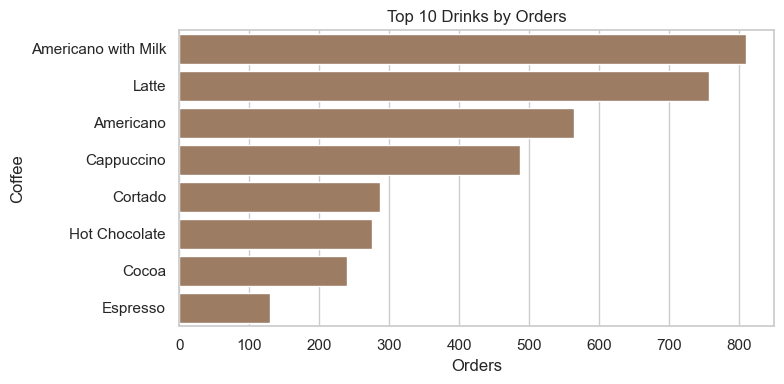

In [9]:
# EDA 2: Top drinks by revenue and count

top_by_revenue = (clean_df.groupby('coffee_name')['amount']
                  .sum().sort_values(ascending=False).head(10))
print(top_by_revenue)

plt.figure(figsize=(8,4))
sns.barplot(x=top_by_revenue.values, y=top_by_revenue.index, color='#6f4e37')
plt.title('Top 10 Drinks by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Coffee')
plt.tight_layout()
plt.show()

# Count
top_by_count = clean_df['coffee_name'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_by_count.values, y=top_by_count.index, color='#a67b5b')
plt.title('Top 10 Drinks by Orders')
plt.xlabel('Orders')
plt.ylabel('Coffee')
plt.tight_layout()
plt.show()


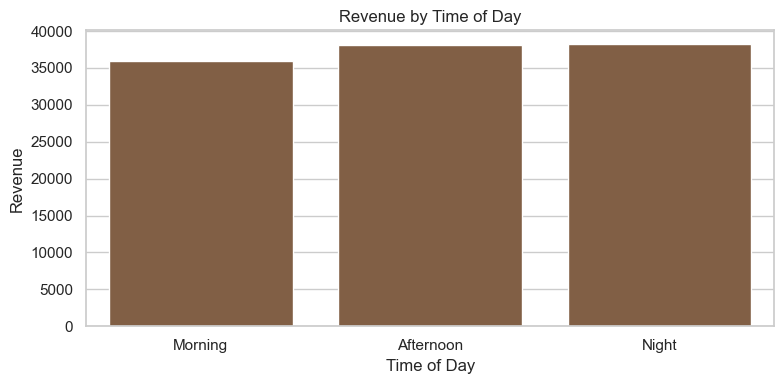

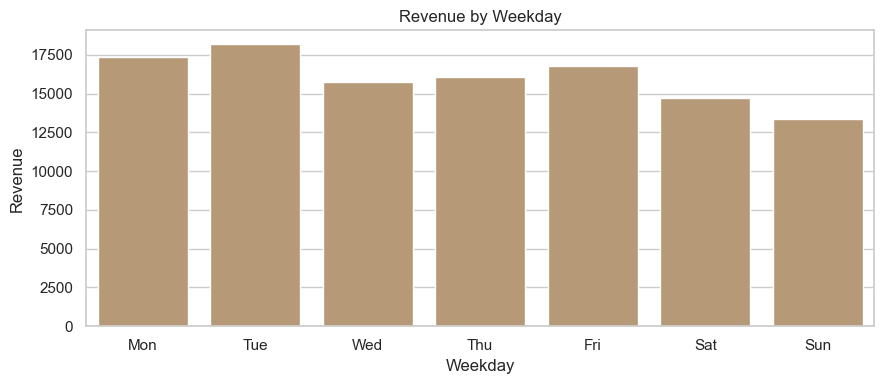

In [10]:
# EDA 3: Sales by time of day and weekday

plt.figure(figsize=(8,4))
sns.barplot(data=clean_df, x='time_of_day', y='amount', estimator=sum, errorbar=None, order=['Morning','Afternoon','Night'], color='#8b5e3b')
plt.title('Revenue by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,4))
weekday_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
sns.barplot(data=clean_df, x='weekday', y='amount', estimator=sum, errorbar=None, order=weekday_order, color='#c19a6b')
plt.title('Revenue by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


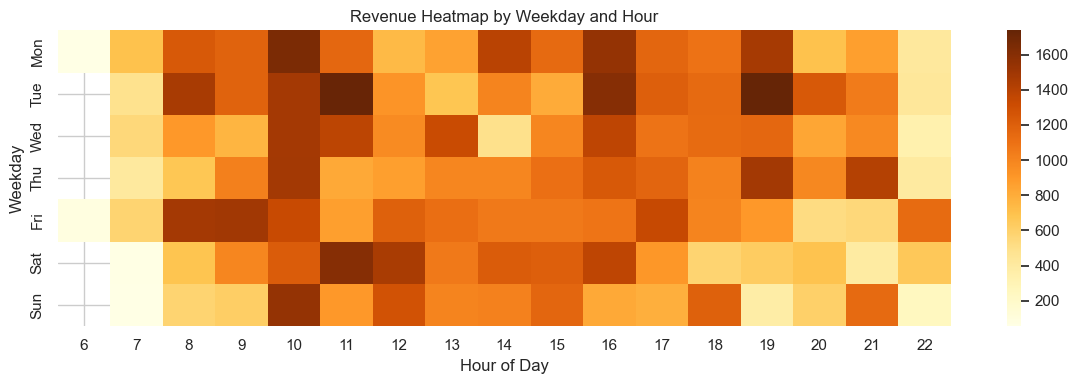

In [11]:
# EDA 4: Hourly pattern heatmap by weekday

pivot = (clean_df
         .pivot_table(index='weekday', columns='hour_of_day', values='amount', aggfunc='sum')
         .reindex(index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']))

plt.figure(figsize=(12,4))
sns.heatmap(pivot, cmap='YlOrBr')
plt.title('Revenue Heatmap by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


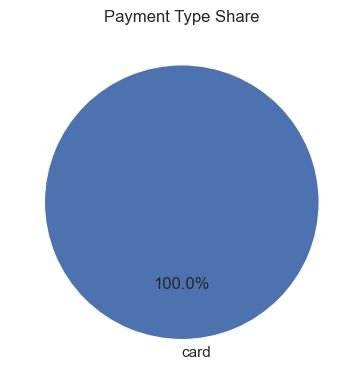

In [12]:
# EDA 5: Payment type mix

plt.figure(figsize=(6,4))
ptype = clean_df['payment_type'].value_counts()
plt.pie(ptype.values, labels=ptype.index, autopct='%1.1f%%', startangle=90)
plt.title('Payment Type Share')
plt.tight_layout()
plt.show()


In [13]:
# Save cleaned data and simple insights

clean_path = 'outputs/coffee_sales_clean.csv'
insights_path = 'outputs/insights.txt'

import os
os.makedirs('outputs', exist_ok=True)

clean_df.to_csv(clean_path, index=False)

with open(insights_path, 'w', encoding='utf-8') as f:
    f.write('Coffee Sales Insights\n')
    f.write('======================\n')
    f.write(f'Total rows: {len(clean_df)}\n')
    f.write(f'Total revenue: {round(clean_df["amount"].sum(), 2)}\n')
    f.write(f'Average ticket: {round(clean_df["amount"].mean(), 2)}\n')
    f.write('\nTop 5 drinks by revenue:\n')
    f.write(top_by_revenue.head(5).to_string() + '\n')

(clean_path, insights_path)


('outputs/coffee_sales_clean.csv', 'outputs/insights.txt')

## Conclusions & Next Steps

- Latte, Hot Chocolate, and Americano variants appear frequently and drive strong revenue.
- Revenue peaks align with Morning/Afternoon and increase on weekends.
- Card payments dominate in this sample.

Next steps you could try:
- Build a daily/weekly trend line chart.
- Add price normalization or discounts if available.
- Segment by time windows (commute vs lunch) or by drink temperature.
- Export plots to `reports/` and write a short report.


## How to run

1. Install requirements: `pip install -r requirements.txt`
2. Open this notebook: `jupyter notebook`
3. Run cells top-to-bottom. Outputs will be saved in `outputs/`.


# Thank You